# RKN

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment
# exps = [f"experiments/80G_3ch_ampbcstep_M41_rho8_p{x/10:.1f}"  for x in range(11, 31)]
exps = [f"experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p{x/10:.1f}"  for x in range(11, 31)]
datas = {name:load_experiment(name) for name in exps}

print('RMPS:', datas['experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p1.1']['model'].rmps())

p = np.array([x/10  for x in range(11, 31)])
Q =  np.array([datas[key]['Metric/Qsq']['value'][-1] for key in exps])

plt.figure(dpi=200, figsize=(6, 4))
plt.plot(p, Q, '-o')
plt.xlabel('p')
plt.ylabel('Q')
plt.title('Q vs p')
plt.text(2, Q[p==2][0], f'Q = {Q[p==2][0]}')
plt.text(p[np.argmax(Q)], np.max(Q), f' max Q = {Q[np.argmax(Q)]}')
plt.grid()
plt.show()

RMPS: 8086.8807658764545


# Q-P curve

experiments/80G_3ch_fdbp_v1 rmps: 1322.7408844584097
experiments/80G_3ch_fdbp_v1 Best Q afctor:  8.74764101115565
experiments/80G_3ch_pbcdbp_v13 rmps: 2314.4214117770116
experiments/80G_3ch_pbcdbp_v13 Best Q afctor:  8.97182425912603


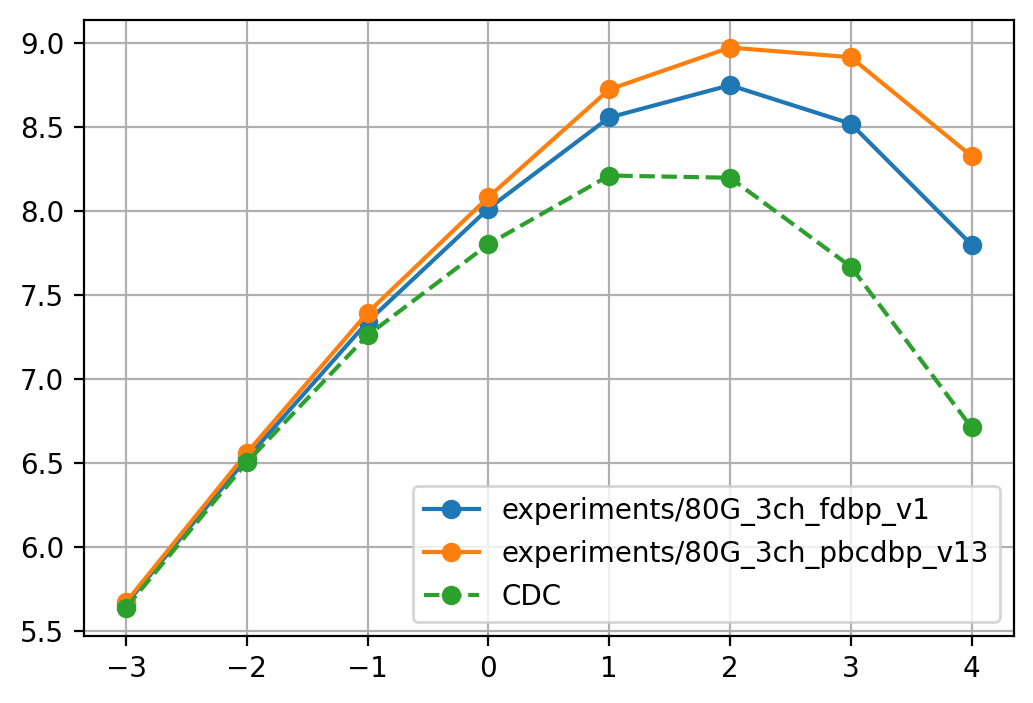

In [115]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment, load_baseline
import pkufiber as pf

paths = [
        # 'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161',
        # 'experiments/80G_3ch_frepbc_M81_rho1_ol160_strides161',
        # 'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides321',
        'experiments/80G_3ch_fdbp_v1',
        'experiments/80G_3ch_pbcdbp_v13'
        # 'experiments/80G_3ch_pbcdbp_v2',
        # 'experiments/80G_3ch_pbcdbp_v4',
        # 'experiments/80G_3ch_pbcdbp_v6',
        # 'experiments/80G_3ch_ampbcstep_M401_rho1',
        # 'experiments/80G_3ch_ampbcstep_M41_rho2',
        # 'experiments/80G_3ch_pbc_M161_rho2',
        # 'experiments/80G_3ch_pbc_M41_rho2',
        # 'experiments/80G_3ch_frepbc_M201_ol200_rho1_strides201',
        # 'experiments/80G_3ch_frepbc_M81_rho1_ol80_strides321',
        ]

results = {path: load_experiment(path) for path in paths}

plt.figure(dpi=200, figsize=(6, 4))
for key, result in results.items():
    qfactor, power = result['qfactor_power']
    print(f'{key} rmps:', result['model'].rmps())
    plt.plot(power, qfactor, '-o', label=key)
    print(key, 'Best Q afctor: ', np.max(qfactor))

# CDC
cdc, power = load_baseline('configs/dsp/test_eq.yaml', 'CDC')
plt.plot(power, cdc, '--o', label='CDC')


plt.grid()
plt.legend()
# plt.ylim(7, 8.5)

In [9]:
## constellation
# import pkufiber as pf 
# y = np.load(paths[0] + '/results/y_2dBm.npy')
# x = np.load(paths[0] + '/results/x_2dBm.npy')
# pf.show_symb(y[0:5000], x[0:5000], s=1) 

In [25]:
from pkufiber.dsp.nonlinear_compensation.rmps import  rmps_edc 
import matplotlib.pyplot as plt

N = np.linspace(10, 20000, 100)
R = [rmps_edc(n) for n in N]

/home/xiaoxinyu/miniforge3/envs/pkufiber/lib/python3.9/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


experiments/80G_3ch_pbcdbp_v12 8.83363795391348
experiments/80G_3ch_pbcdbp_v13 8.97182425912603
experiments/80G_3ch_pbcdbp_v14 8.967447103203812
experiments/80G_3ch_pbcdbp_v15 8.974960038262223
experiments/80G_3ch_pbcdbp_v16 8.979993642794355


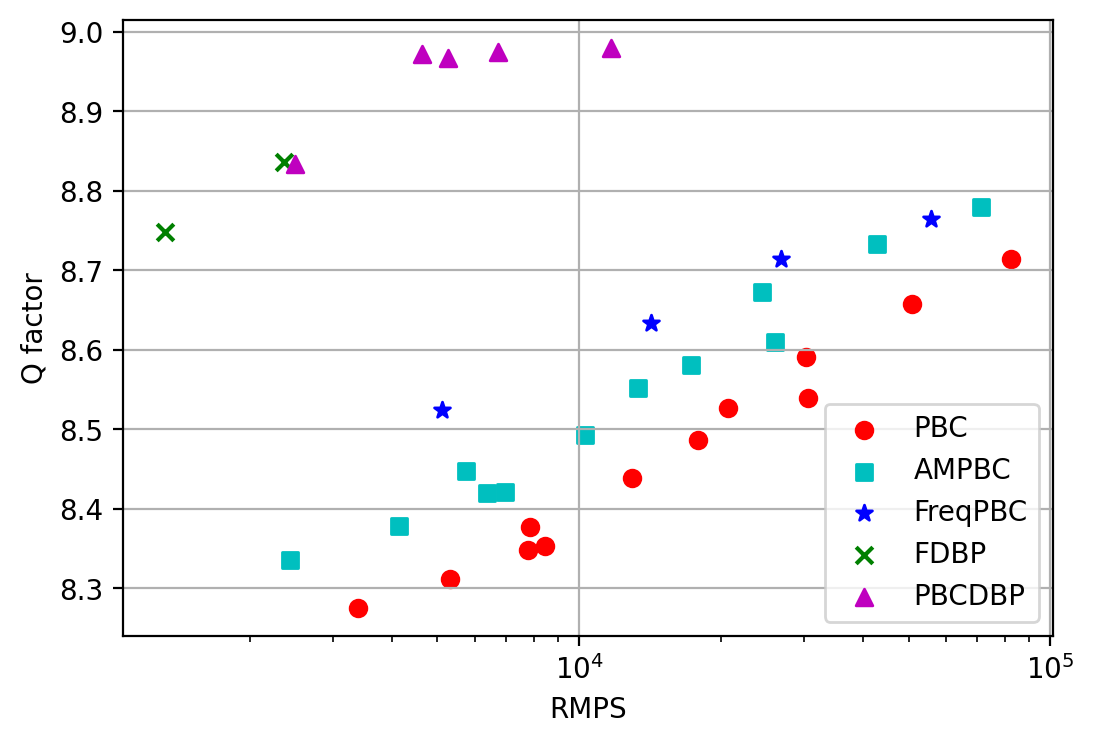

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment, load_baseline
import pkufiber as pf

paths = [f'experiments/80G_3ch_pbc_M{M}_rho{rho}' for M in [41, 81, 161] for rho in [1, 2, 4, 8]] + [
        f'experiments/80G_3ch_ampbcstep_M{M}_rho{rho}' for M in [41, 81, 161] for rho in [1, 2, 4, 8]] + [
        'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161',
        'experiments/80G_3ch_frepbc_M201_ol200_rho1_strides201',
        'experiments/80G_3ch_frepbc_M81_rho1_ol80_strides161',
        'experiments/80G_3ch_frepbc_M161_rho1_ol80_strides321',
        ] + [
            'experiments/80G_3ch_fdbp_v1',
            # 'experiments/80G_3ch_fdbp_v3',
            # 'experiments/80G_3ch_fdbp_v4',
            # 'experiments/80G_3ch_fdbp_v5',
            'experiments/80G_3ch_fdbp_v7',
            # 'experiments/80G_3ch_pbcdbp_v1',
            # 'experiments/80G_3ch_pbcdbp_v2',
            # 'experiments/80G_3ch_pbcdbp_v8',
            # 'experiments/80G_3ch_pbcdbp_v10',
            # 'experiments/80G_3ch_pbcdbp_v6',
            'experiments/80G_3ch_pbcdbp_v12',
            'experiments/80G_3ch_pbcdbp_v13',
            'experiments/80G_3ch_pbcdbp_v14',
             'experiments/80G_3ch_pbcdbp_v15',
              'experiments/80G_3ch_pbcdbp_v16',
        ]

results = {path: load_experiment(path) for path in paths}

import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=200, figsize=(6, 4))

# 初始化两个空列表用于存储 scatter 对象
scatter_frepbc = None
scatter_other = None
scatter_fdbp = None
scatter_pbcdbp = None
scatter_ampbcstep = None

for key, res in results.items():
    rmps = results[key]['model'].rmps() 
    Qmax = np.max(results[key]['qfactor_power'][0])

    if 'frepbc' in key:
        scatter_frepbc = plt.scatter(rmps, Qmax,c='b', marker='*', label='FreqPBC') if scatter_frepbc is None else plt.scatter(rmps, Qmax,c='b', marker='*')
    elif 'fdbp' in key:
        scatter_fdbp = plt.scatter(rmps, Qmax,c='g', marker='x', label='FDBP') if scatter_fdbp is None else plt.scatter(rmps, Qmax,c='g', marker='x')
    elif 'pbcdbp' in key:
        scatter_pbcdbp = plt.scatter(rmps, Qmax,c='m', marker='^', label='PBCDBP') if scatter_pbcdbp is None else plt.scatter(rmps, Qmax,c='m', marker='^')
        print(key, Qmax)
    elif 'ampbcstep' in key:
        scatter_ampbcstep = plt.scatter(rmps, Qmax,c='c', marker='s', label='AMPBC') if scatter_ampbcstep is None else plt.scatter(rmps, Qmax,c='c', marker='s')
    else:
        scatter_other = plt.scatter(rmps, Qmax,c='r', marker='o', label='PBC') if scatter_other is None else plt.scatter(rmps, Qmax,c='r', marker='o')

plt.xlabel('RMPS')
plt.ylabel('Q factor')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()


In [7]:
results['experiments/80G_3ch_pbcdbp_v1']['model'].rmps()

7228.1354417650155

In [8]:
results['experiments/80G_3ch_fdbp_v1']['model'].rmps()

1322.7408844584097

In [6]:
results['experiments/80G_3ch_pbcdbp_v13']['model'].rmps()

7167.4745307289995

In [1]:
import pkufiber.dsp.nonlinear_compensation as nl
from pkufiber.dsp.nonlinear_compensation.rmps import rmps_edc

In [5]:
nl.EqAMPBC(M=161, rho=8).rmps()

71170.99363990009

In [10]:
nl.EqPBC(M=401, rho=0.1, index_type='reduce-1').rmps()

10668

In [ ]:
nl.EqFrePBC(M=41, rho=0.1, overlaps=40, strides=101).rmps()

In [ ]:
nl.FDBP(Nmodes=2, step=5, dtaps=2001, ntaps=401).rmps()

In [118]:
nl.PbcDBP(Nmodes=2, step=10, dtaps=2001, ntaps=101, pbc_rho=0.04).rmps()

3354.4214117770116

In [9]:
nl.FreqDBP(Nmodes=2, step=5, M=41, rho=0.1).rmps(strides=101)

5540.905401581266

# Freq PBC

model30.pth loaded.
model30.pth loaded.
model40.pth loaded.
model30.pth loaded.


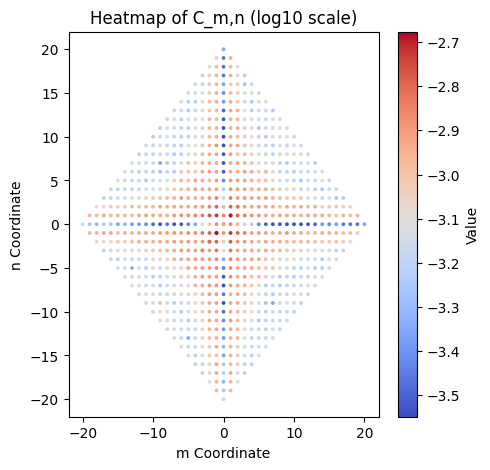

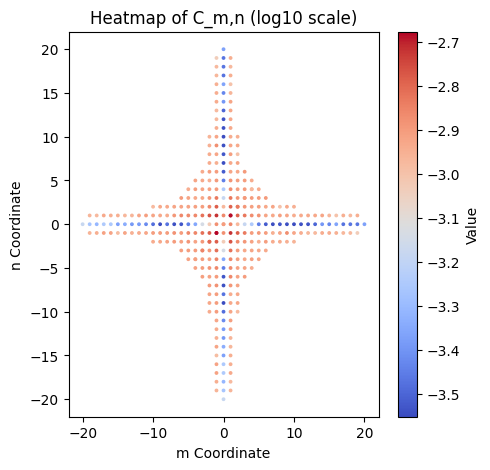

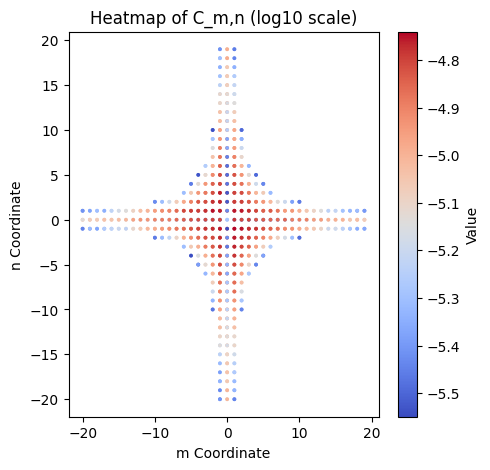

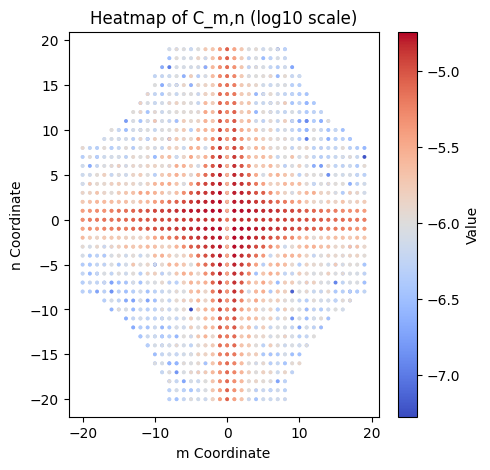

In [88]:
from scripts.test_eq import  load_latest_model 
import pkufiber.dsp.nonlinear_compensation.pbc as pbc

def weight2tensor(fc):
    c = fc.real.weight + 1j * fc.imag.weight
    return c.cpu().detach().squeeze()

model = load_latest_model('experiments/80G_3ch_pbc_M41_rho8')
c = weight2tensor(model.PBC.nn[0])
pbc.show_pbc(c, model.PBC.features.index)

model = load_latest_model('experiments/80G_3ch_pbc_M41_rho1')
c = weight2tensor(model.PBC.nn[0])
pbc.show_pbc(c, model.PBC.features.index)

model = load_latest_model('experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161')
c = weight2tensor(model.fc)
pbc.show_pbc(c, model.index)

model = load_latest_model('experiments/80G_3ch_frepbc_M41_rho8_ol40_strides161')
c = weight2tensor(model.fc)
pbc.show_pbc(c, model.index)